#### <a id='top'></a>

# Homework 2: Data Visualization and Probability Analysis 
***

**Name**: John Ortiz

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 14**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a id='p1'></a>

## (15 points) Problem 1: Theory (Median Distance)
***

One way we conceptualize many data science questions is asking for the "best choice" of some parameter on data set.  We should be able to justify that our measures of centrality should in some way be the "best" ways to represent the data.


In lecture, we may have discussed the following important property of the mean:


The *sample mean* of data $X_1, X_2, \dots X_n$ is the unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n \left(X_i-c \right)^2. $$

The proof of that claim is as follows:

**Proof:**

Differentiating yields
$$f'(c)=\frac{df}{dc}\sum_{i=1}^n \left(X_i-c \right)^2 =\sum_{i=1}^n-2(X_i-c).$$ 

Setting $f'(c)=0$ gives

$$0=\sum_{i=1}^n-2(X_i-c)$$
$$=2nc-2\sum_{i=1}^n X_i$$
$$\implies\qquad  c=\frac{\sum_{i=1}^n X_i}{n}=\bar{X}$$

***

### Your exercise:

You are tasked with recreating a *similar* proof.  Prove the following:

The *median* of data $X_1, X_2, \dots X_n$ is the possibly non-unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n |X_i-c| $$

A few things to think about:

 - how do we differentiate the absolute value function?
 - what conditions might make the median non-unique in this case?  If it's nonunique, what possible values of $c$ still minimize the function $f$?

**We know $\frac{d}{dx}(\mid x \mid) = \frac{d}{dx}(\sqrt{x^2}) =  \frac{1}{2}(x^2)^{-\frac{1}{2}}*2 = \frac{x}{(\sqrt{x^2})} = \frac{x}{\mid x \mid}$
<br>$$f(c)=\sum_{i=1}^n |x_i-c |$$<br>
  $$f'(c)=\frac{dc}{dx}(\sum_{i=1}^n |x_i-c |)$$<br>
  $$f'(c)=\sum_{i=1}^n \frac{dc}{dx}(|x_i-c |)$$<br>
  $$f'(c)=\sum_{i=1}^n \frac{x_i-c}{|x_i-c |} * -1  $$,using chain rule
  $$f'(c)=\sum_{i=1}^n \frac{c- x_i}{|x_i-c |}  $$,distributing the negative to the numerator
  $$f'(c)=sign(x_i-c) $$, sign(x) is a function described to return the sign of the value
  $$0=sign(x_i-c) $$, setting the equation equal to zero <br>
  <br> It is good to know about the sign function: $$ sign(x) = 1 , x>0 $$ 
  $$ -1,  x<0 $$
  So for our function this means f'(c) will only equal zero when the items greater than all the $x_i$ terms equals all the items less than are $x_i$ proving c is a minimizer.The conditions that might make the median non-unique is if the set X contains an $x_i$ that is in the data set more than one and is the minimizer.**

[Back to top](#top)
<a id='p2'></a>

## (40 pts) Problem 2: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to repreesnt a data problem, and questions of *how* to compute that data value.  Question 1 - and prior lectures - should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**:

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the mean of the data set with $n$ observations?


**<Br>$y = \sum_{k=1}^n $ : Cost = n-1 computations <Br>
<Br>$\frac{y}{n}$ : Cost = 1 computations<Br>
<Br>Total Cost =  n computations<Br>**

**Part B**:

Now suppose our data is *streaming*- we slowly add observations one at a time, instead of seeing the entire data set at once.  We are still interested in the mean, so if we stream the data set `[4,6,0,10, ...]`, we first compute the mean of the the first data point `[4]`, then we recompute the mean of the first two points `[4,6]`, then we recompute the mean of three `[4,6,0]`, and so forth.

Suppose we recompute the mean from scratch after each and every one of our $n$ observations are one-by-one added to our data set.  How many floating point operations are spent computing (and re-computing) the mean of the data set?

**Cost of Computing mean: N <br> Adding each cost together is just summing n so our result is: $\sum_{i=1}^n n $**

We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

**Result**: The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


A proof of this result is in the [Appendix](#Appendix) after problem 3, and requires some careful manipulations of the sum $\bar{x}_n$.  Your task will be to computationally verify and utilize this result.

**Part C**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). You may **not** use any built-in sample mean or variance functions.

In [2]:
def my_sample_mean (arr):
    #mean calc
    sum1 = 0
    for i in arr:
        sum1+= i
    return sum1/(arr.size)
    
    
#test = np.array([1,2,3,4,5,6])
#my_sample_mean(test)


def my_sample_var(arr):
    mean = my_sample_mean(arr)
    temp =arr #temp copy of orig array
    diffArr2= np.array(temp,dtype=float) #instantiates a separate copy of the array at different memory location
    for i in range(0,diffArr2.size): 
        diffArr2[i]= float(diffArr2[i] - mean)
    #print("Array after sub mean: " + str(diffArr2))
    
    for i in range(0,diffArr2.size): 
        diffArr2[i]= np.square(diffArr2[i])
    #print("Array after squared: " + str(diffArr2))
    
    #sum for numerator
    numerator = 0
    for i in diffArr2:
        numerator += i
        
    #denominator
    denominator = arr.size -1
    
    return numerator/denominator


#sanity check
#print("mean: " + str(my_sample_mean(test)))
#print("meanTrue: " + str(np.mean(test)))
#print("variance: " + str(my_sample_var(test)))
#print("varianceTrue: " + str(np.var(test,ddof=1)))

**Part D**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon.

`bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42]`

In [3]:
bus = np.array([312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42])
print("mean: " + str(my_sample_mean(bus)))
print("variance: " + str(my_sample_var(bus)))

mean: 56.416666666666664
variance: 7274.628787878787


**Part E**: Implement a third function called `update_mean` that implements the formula discussed after part B. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. This function may be auto-graded, so please do not change the given header API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first buff buses' lateness, the first two buff buses' lateness, the first three buff buses' lateness, and so on up to all of the `bus` data points from **Part D**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 12 estimates in `buffbus_bad_means`.

In [4]:
# Given API:
def update_mean(prev_mean, xn, n):
    #Your code here to compute updates
    xnSubPrevMean = xn - prev_mean
    xnPrevM_DivN = xnSubPrevMean/ n
    now_mean = xnPrevM_DivN + prev_mean
    
    return now_mean


#main(loop over data)
buffbus_bad_means = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],dtype = float)
for i in range(0,bus.size):
    #case 1 first element to be added
    if(i==0):
        buffbus_bad_means[i] = update_mean(0,bus[i],1)
    #case 2 else
    else:
        buffbus_bad_means[i] = update_mean(buffbus_bad_means[i-1],bus[i],i+1)
        
        
print("buffbus_bad_means: " + str(buffbus_bad_means))

#print("meanTrue: " + str(np.mean(bus)))

buffbus_bad_means: [312.         158.         108.66666667  81.5         69.6
  64.5         66.85714286  60.875       55.          55.5
  57.72727273  56.41666667]


**Above is the precise float means below is the less precise int answers of them. <br>
buffbus_bad_means: [312 , 158 , 108 ,  81 , 69 , 64 , 66 , 60 , 54 , 54 , 56 , 54]**

To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [5]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part F**:

How many floating point operations were spent computing the final result in your code in **part E**?  Is this truly better than the uninformed approach from **part B**?

**updateMean function has a constant operation cost of 3. So in total it would cost: n*3 computations <br> In specifics for part e it was a total of 36 computation where n=12. So yes this is truly better than the uninformed approach from part B( $\sum_{i=1}^n n $ ), so for part e the total computations would be $\sum_{i=1}^{12} 12 = 12*12 = 144 $ coputations which is greater than part e code.**

[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [6]:
filepath = '../Data/titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [7]:
sumSurvive = 0
sumRip = 0
for i in df.loc[:,"Survived"]:
    if(i):
        sumSurvive+=1
    else:
        sumRip+=1
print("Survived: " + str(sumSurvive))
print("rip: " +  str(sumRip))
probOfSurvival = sumSurvive/(sumSurvive + sumRip)
print("The probability of survival is: " + str(probOfSurvival))

Survived: 350
rip: 541
The probability of survival is: 0.39281705948372614


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**If class warfare occurred in the final hours aboard the Titanice we would expect the probability of surviving given someone is in first class to be considerably higher that than the probability of surviving given one is in second or third class. If male chivalry was widespread I would expect the probability of surviving given one is male is to be extremely low compared to the probability of surviving given one is a child or a women. These hypotheses are not mutually exclusive because one could could see that more of the higher class survived and more women and children survived than men. One can see both these can happen at the same time.**

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [8]:
dfTitanic = df.dropna(subset=["Survived", "Pclass", "Age","Sex"]).copy()#dropna allows us to use subset of columns to drop rows with missing values
dfTitanic.info()

for col in dfTitanic.columns: 
    if((col != "Name") & (col !="Sex") &  (col !="Ticket")& (col !="Cabin") & (col !="Embarked")):
        #print(col)
        dfTitanic.loc[:,col] = dfTitanic.loc[:,col].astype(float)

dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 888
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          165 non-null object
Embarked       713 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 888
Data columns (total 12 columns):
PassengerId    714 non-null float64
Survived       714 non-null float64
Pclass         714 non-null float64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null float64
Parch          714 non-null float64
Ticket         714 non-n

**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [10]:
#p(class) = {1,2,3} 
    #p(Survive | class 1)
    #p(Survive | class 2)
    #p(Survive | class 3)
class_columns = dfTitanic[["Pclass","Survived"]]
dfClass = class_columns.copy()




c1Survive = 0
c1Dead = 0
c2Survive = 0
c2Dead = 0
c3Survive = 0
c3Dead = 0

for i in dfClass.itertuples(): # i[1]=pClass i[2]=Survived 
    if(i[1]==1.0 and i[2]== 1):
        #class 1 and survived
        c1Survive +=1
    elif(i[1]==1.0 and i[2]== 0):
        #class 1 and dead
        c1Dead +=1
    elif(i[1]==2.0 and i[2]== 1):
        #class 2 and survived
        c2Survive +=1
    elif(i[1]==2.0 and i[2]== 0):
        #class 2 and dead
        c2Dead +=1
    elif(i[1]==3.0 and i[2]== 1):
        #class 3 and survived
        c3Survive +=1
    elif(i[1]==3.0 and i[2]== 0):
        #class 3 and dead
        c3Dead +=1 
    else:
        print("Should not get here")
        
def Prob(event,notEvent):
    return str(event/(event +notEvent))



print  ("p(Survive - class 1) = "+ Prob(c1Survive, c1Dead))
print  ("p(Survive - class 2) = "+ Prob(c2Survive, c2Dead))
print  ("p(Survive - class 3) = "+ Prob(c3Survive, c3Dead))
print("")
#print  ("p(Not Surviving - class 1) = "+ Prob(c1Dead, c1Survive))
#print  ("p(Not Surviving - class 2) = "+ Prob(c2Dead, c2Survive))
#print  ("p(Not Surviving - class 3) = "+ Prob(c3Dead, c3Survive))
#print("")


#p(gender) = {male,female}
    #p(Survive - male)
    #p(Survive - female)
Gen_columns = dfTitanic[["Sex","Survived"]]
dfGender = Gen_columns.copy()
    
maleSurvived = 0
maleDead = 0
femaleSurvived = 0
femaleDead = 0

for i in dfGender.itertuples(): # i[1]=sex i[2]=Survived 
    if(i[1] == "male"and i[2]== 1):
        #male that survived
         maleSurvived +=1
    elif(i[1]== "male" and i[2]== 0):
        #male and dead
        maleDead +=1
    elif(i[1]=="female"and i[2]== 1):
        #female and survived
        femaleSurvived +=1
    elif(i[1]=="female"and i[2]== 0):
        #female and dead
        femaleDead +=1
    else:
        print("Should not get here")
    
print  ("p(Survive - male) = "+ Prob(maleSurvived, maleDead))
print  ("p(Survive - female) = "+ Prob(femaleSurvived, femaleDead))  
print("")
#print  ("p(Not Surviving - male) = "+ Prob(maleDead, maleSurvived))
#print  ("p(Not Surviving - female) = "+ Prob(femaleDead, femaleSurvived))   
#print("")
    
    
#combo p(survival - (class & gender))
    #p(survival - (class 1 & male))
    #p(survival - (class 1 & female))
    #p(survival - (class 2 & male))
    #p(survival - (class 2 & female))
    #p(survival - (class 3 & male))
    #p(survival - (class 3 & female))
    
both_columns = dfTitanic[["Pclass","Sex","Survived"]]
dfBoth = both_columns.copy()   


m1Survived = 0
m1Dead = 0
f1Survived = 0
f1Dead = 0

m2Survived = 0
m2Dead = 0
f2Survived = 0
f2Dead = 0

m3Survived = 0
m3Dead = 0
f3Survived = 0
f3Dead = 0
for i in dfBoth.itertuples(): # i[1]=Pclass, i[2]=Sex, i[3] = "Survived"
    
    #class1
    if(i[1]== 1 and i[2]== "male" and i[3] == 1):
        #class 1, male, survived
        m1Survived +=1
    elif(i[1]== 1 and i[2]== "male" and i[3] == 0):
        #class 1, male, dead
        m1Dead +=1
    elif(i[1]== 1 and i[2]== "female" and i[3] == 1):
        #class 1, female, survived
        f1Survived +=1
    elif(i[1]== 1 and i[2]== "female" and i[3] == 0):
        #class 1, male, dead
        f1Dead +=1
        
        
    #class 2
    elif(i[1]== 2 and i[2]== "male" and i[3] == 1):
        #class 2, male, survived
        m2Survived +=1
    elif(i[1]== 2 and i[2]== "male" and i[3] == 0):
        #class 2, male, dead
        m2Dead +=1
    elif(i[1]== 2 and i[2]== "female" and i[3] == 1):
        #class 2, female, survived
        f2Survived +=1
    elif(i[1]== 2 and i[2]== "female" and i[3] == 0):
        #class 2, male, dead
        f2Dead +=1
        
        
    #class 3
    elif(i[1]== 3 and i[2]== "male" and i[3] == 1):
        #class 3, male, survived
        m3Survived +=1
    elif(i[1]== 3 and i[2]== "male" and i[3] == 0):
        #class 3, male, dead
        m3Dead +=1
    elif(i[1]== 3 and i[2]== "female" and i[3] == 1):
        #class 3, female, survived
        f3Survived +=1
    elif(i[1]== 3 and i[2]== "female" and i[3] == 0):
        #class 3, male, dead
        f3Dead +=1
    else:
        print("Should not be here")
        

print  ("p(Survive - (class 1 & male) ) = "+ Prob(m1Survived, m1Dead))
print  ("p(Survive - (class 1 & female) ) = "+ Prob(f1Survived, f1Dead))
print  ("p(Survive - (class 2 & male) ) = "+ Prob(m2Survived, m2Dead))
print  ("p(Survive - (class 2 & female) ) = "+ Prob(f2Survived, f2Dead))
print  ("p(Survive - (class 3 & male) ) = "+ Prob(m3Survived, m3Dead))
print  ("p(Survive - (class 3 & female) ) = "+ Prob(f3Survived, f3Dead))
print("")
#print  ("p(Not Surviving - (class 1 & male) ) = "+ Prob(m1Dead, m1Survived))
#print  ("p(Not Surviving - (class 1 & female) ) = "+ Prob(f1Dead, f1Survived))
#print  ("p(Not Surviving - (class 2 & male) ) = "+ Prob(m2Dead, m2Survived))
#print  ("p(Not Surviving - (class 2 & female) ) = "+ Prob(f2Dead, f2Survived))
#print  ("p(Not Surviving - (class 3 & male) ) = "+ Prob(m3Dead, m3Survived))
#print  ("p(Not Surviving - (class 3 & female) ) = "+ Prob(f3Dead, f3Survived))
#print("")
        

p(Survive - class 1) = 0.6428571428571429
p(Survive - class 2) = 0.4827586206896552
p(Survive - class 3) = 0.2518703241895262

p(Survive - male) = 0.19654427645788336
p(Survive - female) = 0.749003984063745

p(Survive - (class 1 & male) ) = 0.3870967741935484
p(Survive - (class 1 & female) ) = 0.96
p(Survive - (class 2 & male) ) = 0.1839080459770115
p(Survive - (class 2 & female) ) = 0.9310344827586207
p(Survive - (class 3 & male) ) = 0.13780918727915195
p(Survive - (class 3 & female) ) = 0.5254237288135594



**i)<br> P(Survival - Class 1) = .64 <br> P(Survival - Class 2) = .48 <br> P(Survival - Class 3) = .25 <br>
P(Survival) = .39 <br> We can see that as one moves up in class rank than the chance of survival increases. In third class one is well below the survival rate from part a as 1st class and 2nd class are above the survival rate. One can see the class warfare could easily have been possible.<br> <br>
ii) <br> P(Survival - Male) = .19 <br> P(Survival - Female) = .74 <br> P(Survival) = .39 <br> We can see that males were well below the survival probability from part A, as the Females were above it. One can see that chivalry could easily have made this disparity.<br> <br>
iii)In each Class: <br>
Class 1: p(female) = .96 > p(male) = .39  $\to $ females more likely to survive<br>
Class 2: p(female) = .93 > p(male) = .18  $\to $ females more likely to survive<br>
Class 3: p(female) = .52 > p(male) = .14  $\to $ females more likely to survive<br><br>
iv) P(class 1 & male) = .39 < p(class 3 & female) = .53 $\to $ females still more likely to survive<br>**


**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

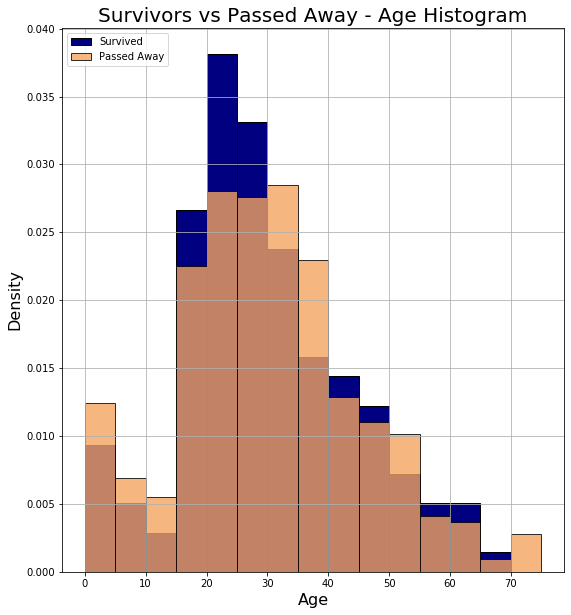

In [11]:
my_bins = range(0,80,5)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,10))
dfTitanic.loc[dfTitanic["Survived"]==1.0].hist(column ="Age",ax = ax,facecolor="navy",edgecolor="black",density = True,bins = my_bins)
dfTitanic.loc[dfTitanic["Survived"]==0.0].hist(column ="Age",ax = ax,facecolor="sandybrown",edgecolor="black",density = True,bins = my_bins,alpha=.8)

ax.set_title("Survivors vs Passed Away - Age Histogram",fontsize=20)
plt.xlabel('Age',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.legend(["Survived","Passed Away"],loc="upper left")



**Yes my figure does suggest that if one is : <10 or 30-40 or >70 you have a higher chance of not surviving. Out of the relationship we can see  that if one was <10 in age than if they lose their caretake would not be able to fend for them selves. If one >70 it can also be inferred that if one was >70 they would not be as mobile and would have less of a chance of survivability. Another possible explanation could be that they did not let anyone on the lifeboats >70. I can not think of why more 30-40 years died.**

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**A density histogram shows units in each bin size that add the area underneath the curve to 1. This manipulation enable us to see a curve of the population on same vertical scale. As a frequency histogram simply shows the amount of times that bin occurs. This can quickly seem misleading if not on the same scale.**

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**I do believe that it is a combination of these three factors(class warfare, male chivalry, age bias). We can definitely see true correlations when calculating the probability of surviving base on class and sex in part D. This clearly showed a biased of surviving toward women and having a higher class. In terms of age, the biased of surviving is clearly centered toward the middle age group looking at the histogram in part E. If one is to young(<10) or to old(>70) their chance of survial does not seem as good.**

**P.S.** It is not a component of your graded assignment, but the 1997 James Cameron film _Titanic_ captured some of these very notions in some riveting cinema. Whether or not you found evidence for these cases in the data, you might find it interesting to watch the movie (or just the segments of the sinking) to see one interpretation of these ideas. You can perhaps see how we might be persuaded to reinterpret the evidence of data by a heart-wrenching performance from a handsome young Leonardo DiCaprio!

<a id='Appendix'></a>

## Appendix 

*Goal*: Prove that 
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}



In [ ]:





























tc = 52
#faces={"faceValue":np.array(["Ace","Two","Three","Four","Five","Six","Seven","Eight","Nine","Ten","Jack","Queen","King"]),'probFace' : np.array([4/tc,4/tc,4/tc,4/tc,4/tc,4/tc,4/tc,4/tc,4/tc,4/tc,4/tc,4/tc,4/tc])}
#suits={"suitValue": np.array(["Hearts","Spades","Clubs","Diamonds"]),'probSuit' : np.array([13/tc,13/tc,13/52,13/tc])}
faceValue = np.array(["Ace","Two","Three","Four","Five","Six","Seven","Eight","Nine","Ten","Jack","Queen","King"])
suitValue = np.array(["Hearts","Spades","Clubs","Diamonds"])
nsamp=10000




f1 = np.random.choice(faceValue, size=nsamp)
df = pd.DataFrame({"faceD1": f1})
s1 = np.random.choice(suitValue, size=nsamp)
df["suitD1"] = pd.DataFrame({"suitD1": s1})
df['card_D1'] = df['faceD1'].str.cat(df['suitD1'],sep=" ")

tc=tc-1
#drawTwo

df["f5"]= df.apply(drawThree_Face, axis=1)  
df["s5"]= df.apply(drawThree_Suit, axis=1)
df['card_D5'] = df['f5'].str.cat(df['s5'],sep=" ")
df.head(10)











#test= len(df.loc[ (df["card_D1"]== df["card_D2"]) & (df["card_D2"]==df["card_D3"]) & (df["card_D3"]!=df["card_D4"])& (df["card_D3"]!=df["card_D5"])])
#print(test)
# threeOfKindProb /nsamp
#function that adds face and suit called cardD1 ..
import itertools
test = np.array(["card_D1","card_D2","card_D3","card_D4","card_D5"])
testL = list(itertools.combinations(test,3))
count = 0
for i in range(0,len(testL)):
    temp = np.array(testL[i])
    count = count + len(df.loc[(df[temp[0]]==df[temp[1]]) & (df[temp[0]]==df[temp[2]])])


three_of_kind_prob=count/nsamp

#three_of_kind_prob= len(df.loc[(df["card_D1"]==df["card_D2"]) & (df["card_D1"]==df["card_D3"])])
print("The three of a kind probability is: " + str(three_of_kind_prob))
#idea: make a function that take the draw on each Row of the data frame and either:
# -draws another fair draw if #1 was white
# -draws from a bag with 3x black and 1x whithe if draw #1 black
#def draw_second(row, marbles):#problem 3 focused on np. random
    #return np.random.choice(marbles) if row[0]=="white" else np.random.choice(marbles, p=[3/4,1/4])

#new column: perform this function once per row of df
#df["d2"]= df.apply(draw_second, axis=1, marbles=marbles) 
#df.head()
#problem 2
#both_black_prob= len(df.loc[(df["d1"]=='black') & (df["d2"]=='black')])/nsamp
#print("Prob of B/B was aprox: ", both_black_prob)




#for i in range(1,6):
    
   #f1 = np.random.choice(faceValue, size=nsamp)
    #s1 = np.random.choice(suitValue, size=nsamp)
    #print(f1)
    #print(s1)
    #playingCard= np.array([f1,s1])
    #if(i!=1):
        #df["faceD"+str(i)] = pd.DataFrame({"faceD"+str(i): f1})
    #df["suitD"+str(i)] = pd.DataFrame({"suitD"+str(i): s1})
    #df['card_D'+str(i)] = df['faceD'+str(i)].str.cat(df['suitD'+str(i)],sep=" ")